In [1]:
import tensorflow as tf
import zipfile


In [4]:
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()
zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0 52074    0     0  57612      0  0:31:41 --:--:--  0:31:41 57667
  0  104M    0  481k    0     0   263k      0  0:06:45  0:00:01  0:06:44  263k
  7  104M    7 8272k    0     0  2932k      0  0:00:36  0:00:02  0:00:34 2934k
 23  104M   23 24.3M    0     0  6522k      0  0:00:16  0:00:03  0:00:13 6523k
 38  104M   38 40.6M    0     0  8637k      0  0:00:12  0:00:04  0:00:08 8640k
 51  104M   51 54.0M    0     0  9516k      0  0:00:11  0:00:05  0:00:06 10.9M
 67  104M   67 70.8M    0     0  10.3M      0  0:00:10  0:00:06  0:00:04 13.9M
 83  104M   83 86.8M    0     0  11.1M      0  0:00:09  0:00:07  0:00:02 15.7M
 99  104M   99  103M    0     0  11.6M      0  0:00:08  0:00:08 --:--:-- 15.6M
100  104M  100  104M    0     0  11.7M      0  0:00

<zipfile.ZipFile [closed]>

In [5]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak\test
there are 0 directories and 250 images in pizza_steak\test\pizza
there are 0 directories and 250 images in pizza_steak\test\steak
there are 2 directories and 0 images in pizza_steak\train
there are 0 directories and 750 images in pizza_steak\train\pizza
there are 0 directories and 750 images in pizza_steak\train\steak


In [6]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [7]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"image shape: {img.shape}")
    return img

['3241894.jpg']
image shape: (512, 512, 3)


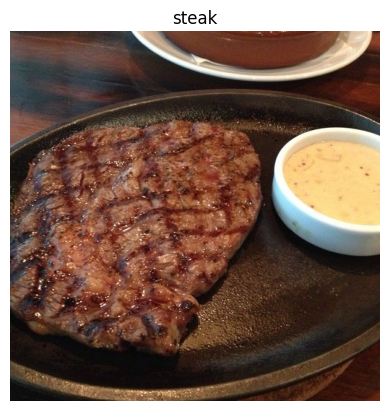

In [9]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [10]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 68,  55,  46],
        [ 70,  57,  48],
        [ 69,  56,  47],
        ...,
        [ 63,  27,  15],
        [ 61,  27,  18],
        [ 61,  27,  18]],

       [[ 83,  70,  61],
        [ 82,  69,  60],
        [ 79,  66,  57],
        ...,
        [ 74,  36,  25],
        [ 74,  37,  28],
        [ 75,  38,  29]],

       [[ 92,  78,  69],
        [ 89,  75,  66],
        [ 85,  72,  63],
        ...,
        [ 88,  48,  36],
        [ 93,  53,  41],
        [ 96,  56,  46]],

       ...,

       [[ 18,  16,  19],
        [ 16,  14,  17],
        [ 14,  12,  15],
        ...,
        [ 99,  39,  15],
        [100,  39,  18],
        [101,  40,  19]],

       [[ 16,  14,  17],
        [ 15,  13,  16],
        [ 15,  13,  16],
        ...,
        [100,  39,  18],
        [ 95,  34,  15],
        [ 96,  35,  16]],

       [[ 15,  13,  16],
        [ 15,  13,  16],
        [ 16,  14,  17],
        ...,
        [104,  43,  2

In [11]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#import data frm directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid'),
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                  validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


D:\Artificial\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Artificial\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 - 8s - 175ms/step - accuracy: 0.5153 - loss: 0.7271 - val_accuracy: 0.5560 - val_loss: 0.6359
Epoch 2/5
47/47 - 6s - 135ms/step - accuracy: 0.6993 - loss: 0.5901 - val_accuracy: 0.7800 - val_loss: 0.4895
Epoch 3/5
47/47 - 6s - 134ms/step - accuracy: 0.7940 - loss: 0.4561 - val_accuracy: 0.8560 - val_loss: 0.3775
Epoch 4/5
47/47 - 7s - 141ms/step - accuracy: 0.8253 - loss: 0.4042 - val_accuracy: 0.8740 - val_loss: 0.3459
Epoch 5/5
47/47 - 6s - 137ms/step - accuracy: 0.8347 - loss: 0.3861 - val_accuracy: 0.8800 - val_loss: 0.3178


In [12]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#import data frm directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

In [ ]:
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential

tf.random.set_seed(42)

model2=Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his2=model2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

In [ ]:
model2.summary()

In [ ]:
tf.random.set_seed(42)
model3 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

his3 = model3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                  validation_steps=len(valid_data), verbose=2)

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/test/", "pizza")

In [ ]:
#Preproccessing data

train_dir = "/Artificial/TENSORFLOW/pizza_steak/train/"
test_dir = "/Artificial/TENSORFLOW/pizza_steak/test/"

#Into batches

from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32, )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
from keras.api.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.models import Sequential
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy

model4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])
his4 = model4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                  validation_data=valid_data, validation_steps=len(valid_data), verbose=2)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(his4.history).plot(figsize=(10, 5))

In [ ]:
def  plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epoch=range(len(history.history['loss']))

#loss
    plt.plot(epoch,loss,label='train loss')
    plt.plot(epoch,val_loss,label='val loss')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.legend()

#accuracy
    plt.figure()
    plt.plot(epoch,accuracy,label='train accuracy')
    plt.plot(epoch,val_acc,label='val accuracy')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.legend()

In [ ]:
plot_loss_curves(his4)

In [ ]:
from keras.api.layers import MaxPool2D

#Adjust overfitting

model5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
his5 = model5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                  validation_steps=len(valid_data), verbose=2)

In [ ]:
model5.summary()

In [ ]:
plot_loss_curves(his5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

In [ ]:
import random
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model6.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=['accuracy'])
hits6 = model6.fit(train_data_augmented,
                   epochs=5,
                   steps_per_epoch=len(train_data_augmented),
                   validation_data=test_data,
                   validation_steps=len(test_data), verbose=2)

In [ ]:
plot_loss_curves(hits6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

In [ ]:
model7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

# Fit the model
his7 = model7.fit(train_data_augmented_shuffled,
                  epochs=5,
                  steps_per_epoch=len(train_data_augmented_shuffled),
                  validation_data=test_data,
                  validation_steps=len(test_data), verbose=2)

In [ ]:
plot_loss_curves(his7)

In [ ]:
!curl -O https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
import zipfile

!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:

from keras_preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

In [ ]:
import tensorflow as tf
from keras.api.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data), verbose=2)

In [ ]:
plot_loss_curves(history1)


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

In [ ]:
model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data), verbose=2)


In [ ]:
plot_loss_curves(history_2)

In [ ]:
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!curl -O -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])

    img = img / 255.
    return img


def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);


# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_2.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
pred = model_2.predict(tf.expand_dims(img, axis=0))
pred